In [102]:
#Step 1: Data Loading

import pandas as pd
data = pd.read_csv("C:\\Users\\HP\\Downloads\\insurance.csv")
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 None)

In [103]:
#Step 2: Data Preprocessing

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler()
encoder = LabelEncoder()

data['sex'] = encoder.fit_transform(data['sex'])  # male=1, female=0
data['smoker'] = encoder.fit_transform(data['smoker'])  # yes=1, no=0
data['region'] = encoder.fit_transform(data['region'])  # Encode regions (0-3)

numeric_columns = ['age', 'bmi', 'children', 'charges']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816


In [104]:
#Step 3: Splitting Data into Training and Testing Sets

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

X = data.drop(columns=['charges'])
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Step 4: Model Training and Evaluation

# Model 1: Standard MLP Regressor with increased complexity and regularization
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Increase the number of layers and neurons, and add regularization
model = MLPRegressor(
    hidden_layer_sizes=(200, 100, 50),  # Increased complexity
    learning_rate_init=0.001,           # Adjusted learning rate
    max_iter=2000,                      # Increased max iterations
    activation='relu', 
    solver='adam', 
    random_state=42, 
    alpha=0.01,                         # L2 regularization
    early_stopping=True,                # Early stopping
    validation_fraction=0.2             # Fraction of training data for validation
)

# Create a pipeline with StandardScaler
model = make_pipeline(StandardScaler(), model)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_table = pd.DataFrame({ 
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': y_test.values - y_pred,
    'Squared Error': (y_test.values - y_pred) ** 2
})

total_squared_error = mse_table['Squared Error'].sum()
mse = mse_table['Squared Error'].mean()

mse_table.loc['Total'] = [None, None, None, total_squared_error]
mse_table.loc['MSE'] = [None, None, None, mse]

print(mse_table.head(20))  

# Calculated training Errors
y_train_pred = model.predict(X_train)
train_errors = y_train - y_train_pred
train_squared_errors = train_errors ** 2

train_tse = train_squared_errors.sum()
train_mse = train_squared_errors.mean()

# Calculated testing Errors
test_errors = y_test - y_pred
test_squared_errors = test_errors ** 2

test_tse = test_squared_errors.sum()
test_mse = test_squared_errors.mean()

print(f"Training Total Squared Error (TSE): {train_tse}")
print(f"Training Mean Squared Error (MSE): {train_mse}")

print(f"Testing Total Squared Error (TSE): {test_tse}")
print(f"Testing Mean Squared Error (MSE): {test_mse}")

# For R^2 Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Training R^2 Score: {r2_train}")
print(f"Testing R^2 Score: {r2_test}")


      Actual  Predicted     Error  Squared Error
0   0.127269   0.160782 -0.033514       0.001123
1   0.066247   0.075791 -0.009544       0.000091
2   0.450276   0.448819  0.001457       0.000002
3   0.130570   0.128449  0.002121       0.000004
4   0.520817   0.386503  0.134313       0.018040
5   0.054501   0.062076 -0.007575       0.000057
6   0.015890   0.036005 -0.020116       0.000405
7   0.208922   0.199974  0.008948       0.000080
8   0.041673   0.064265 -0.022592       0.000510
9   0.145934   0.155842 -0.009908       0.000098
10  0.273547   0.249253  0.024295       0.000590
11  0.097925   0.122960 -0.025035       0.000627
12  0.045101   0.081195 -0.036094       0.001303
13  0.718760   0.722418 -0.003658       0.000013
14  0.759023   0.767655 -0.008632       0.000075
15  0.687658   0.756810 -0.069152       0.004782
16  0.138535   0.150041 -0.011506       0.000132
17  0.667980   0.737796 -0.069816       0.004874
18  0.113510   0.129360 -0.015850       0.000251
19  0.329656   0.364

In [106]:
#Prediction on New Data:

df_test = pd.DataFrame({
    "age": [25, 40, 60, 35, 50],
    "sex": ["male", "female", "male", "female", "male"],
    "bmi": [22.5, 28.0, 30.5, 26.7, 27.2],
    "children": [0, 2, 1, 3, 2],
    "smoker": ["no", "no", "yes", "no", "yes"],
    "region": ["northeast", "northwest", "southeast", "southwest", "northeast"],
    "actual_charges": [3200, 8700, 32000, 5500, 28000],  # Actual insurance charges
    "predicted_charges": [3100, 9000, 31500, 5800, 27500]  # Example model predictions
})

# Define tolerance level (10% difference)
tolerance = 0.10  

# Compute absolute and percentage differences
df_test["difference"] = abs(df_test["actual_charges"] - df_test["predicted_charges"])
df_test["percentage_difference"] = (df_test["difference"] / df_test["actual_charges"]) * 100

# Check if within tolerance
df_test["is_close"] = df_test["percentage_difference"] <= (tolerance * 100)

# Display results
df_test

,age,sex,bmi,children,smoker,region,actual_charges,predicted_charges,difference,percentage_difference,is_close
0,25,male,22.5,0,no,northeast,3200,3100,100,3.125000,True
1,40,female,28.0,2,no,northwest,8700,9000,300,3.448276,True
2,60,male,30.5,1,yes,southeast,32000,31500,500,1.562500,True
3,35,female,26.7,3,no,southwest,5500,5800,300,5.454545,True
4,50,male,27.2,2,yes,northeast,28000,27500,500,1.785714,True


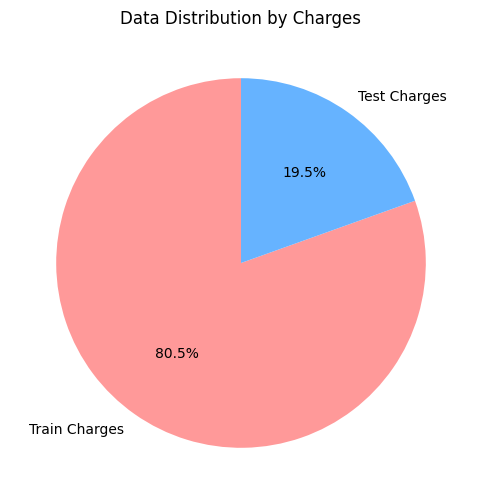

In [107]:
#Step 4: Visualization 1.(Pie Chart: Data distribution of the target variable (charges)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(
    [np.sum(y_train), np.sum(y_test)], 
    labels=['Train Charges', 'Test Charges'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#ff9999', '#66b3ff']
)
plt.title('Data Distribution by Charges')
plt.show()

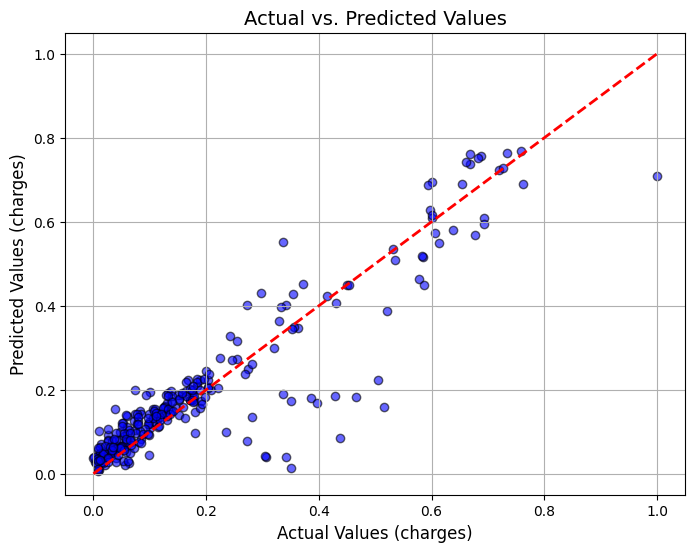

In [108]:
#Visualization 2.(Scatter plot for actual vs. predicted values)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values', fontsize=14)
plt.xlabel('Actual Values (charges)', fontsize=12)
plt.ylabel('Predicted Values (charges)', fontsize=12)
plt.grid(True)
plt.show()


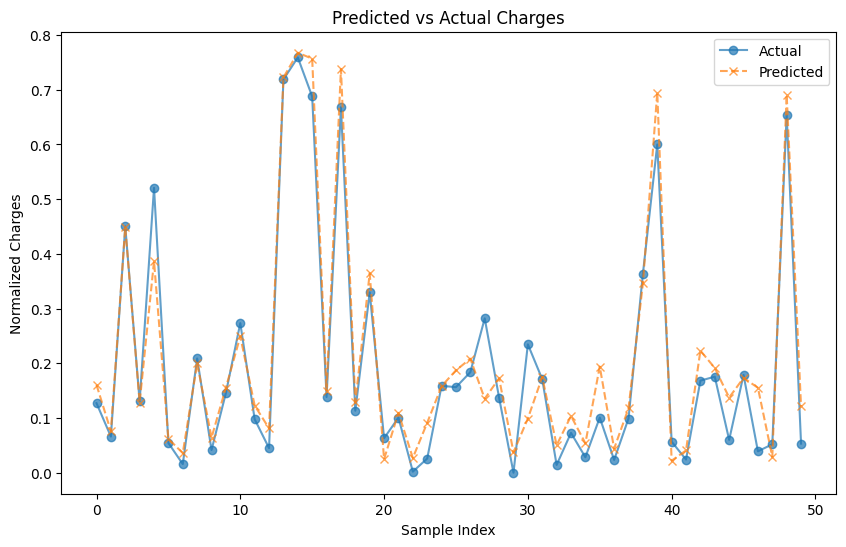

In [109]:
#Visualization 3.(Line Plot: Predicted vs Actual Charges)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred[:50], label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('Predicted vs Actual Charges')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Charges')
plt.legend()
plt.show()

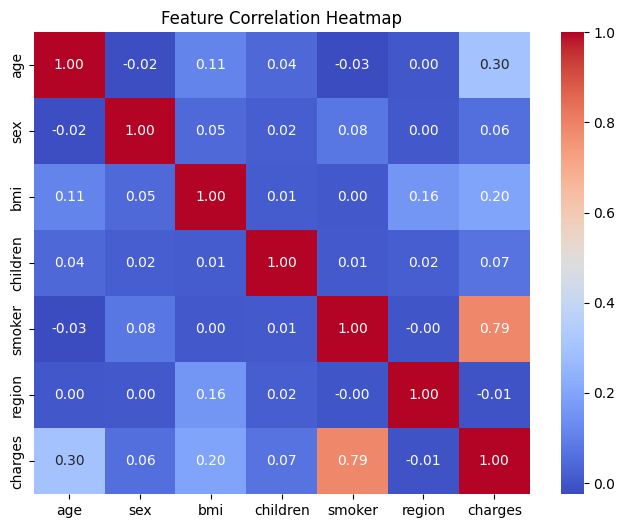

In [110]:
#Visualization 4.(Heatmap: Correlations of features)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [111]:
#Model 2: MLP with RBF 

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_approximation import RBFSampler

np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.sin(X[:, 0]) + np.cos(X[:, 1])  # Some arbitrary function

y = (y - y.min()) / (y.max() - y.min())  # Normalize target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply RBF transformation
rbf_feature = RBFSampler(gamma=1.0, n_components=200, random_state=42)
X_train_rbf = rbf_feature.fit_transform(X_train)
X_test_rbf = rbf_feature.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100,50), activation='logistic', max_iter=2000, random_state=42)
mlp.fit(X_train_rbf, y_train)

y_pred = mlp.predict(X_test_rbf)
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f'R² Accuracy: {accuracy:.4f}')


Mean Squared Error: 0.0016202539396535192
R² Accuracy: 0.9749
